In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date , timedelta

In [5]:
df=pd.read_csv("patient.csv")

In [19]:
df.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [8]:
df.describe()

,id,birth_year,disease,infection_order,infected_by,contact_number
count,7134.000000,417.000000,26.0,35.000000,70.000000,50.000000
mean,3567.500000,1973.474820,1.0,2.285714,379.000000,69.400000
std,2059.552743,18.157298,0.0,1.405272,540.247528,182.876338
min,1.000000,1929.000000,1.0,1.000000,3.000000,0.000000
25%,1784.250000,1960.000000,1.0,1.000000,29.250000,3.000000
50%,3567.500000,1974.000000,1.0,2.000000,126.000000,15.500000
75%,5350.750000,1988.000000,1.0,3.000000,563.250000,44.500000
max,7134.000000,2018.000000,1.0,6.000000,2621.000000,1160.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 15 columns):
id                  7134 non-null int64
sex                 430 non-null object
birth_year          417 non-null float64
country             7133 non-null object
region              418 non-null object
disease             26 non-null float64
group               83 non-null object
infection_reason    144 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      7133 non-null object
released_date       55 non-null object
deceased_date       32 non-null object
state               7133 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 836.1+ KB


In [12]:
df.isna().sum()

id                     0
sex                 6704
birth_year          6717
country                1
region              6716
disease             7108
group               7051
infection_reason    6990
infection_order     7099
infected_by         7064
contact_number      7084
confirmed_date         1
released_date       7079
deceased_date       7102
state                  1
dtype: int64

In [16]:
df['birth_year']=df.birth_year.fillna(0.0).astype(int)
df['birth_year']=df['birth_year'].map(lambda val:val if val > 0 else np.nan)

In [17]:
df.confirmed_date=pd.to_datetime(df.confirmed_date)
daily_count=df.groupby(df.confirmed_date).id.count()

In [18]:
df.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


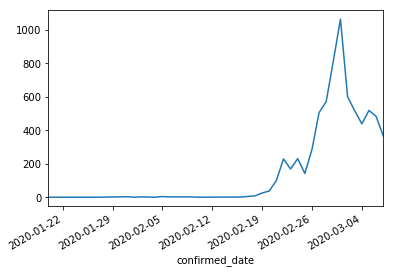

In [20]:
daily_count.plot()

In [27]:
df['age'] = 2020- df['birth_year']

In [28]:
dead=df[df.state=='deceased']

In [29]:
dead

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
37,38,female,1963.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0
53,54,male,1963.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0
54,55,male,1961.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0
103,104,male,1957.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0
106,107,male,1953.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0
113,114,male,1946.0,Korea,Daegu,1.0,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased,74.0
204,205,female,1965.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-21,deceased,55.0
285,286,male,1958.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-23,deceased,62.0
297,298,male,1962.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-25,deceased,58.0
390,391,male,1937.0,Korea,Gyeongsangbuk-do,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-03-05,deceased,83.0


In [40]:
male_dead=dead[dead.sex=='male']
female_dead=dead[dead.sex=='female']

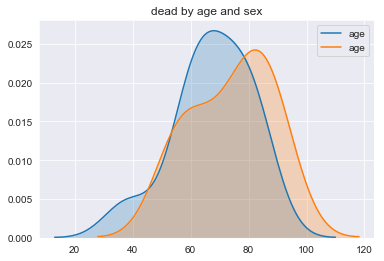

In [42]:
sns.set_style('darkgrid')
plt.title("dead by age and sex")
sns.kdeplot(data=male_dead['age'],shade=True)
sns.kdeplot(data=female_dead['age'],shade=True)

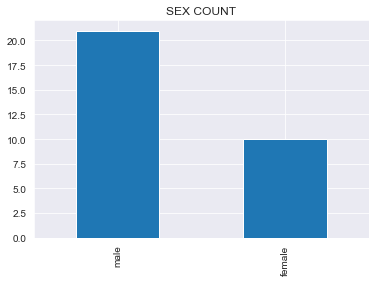

In [44]:
plt.title("SEX COUNT")
dead.sex.value_counts().plot.bar()

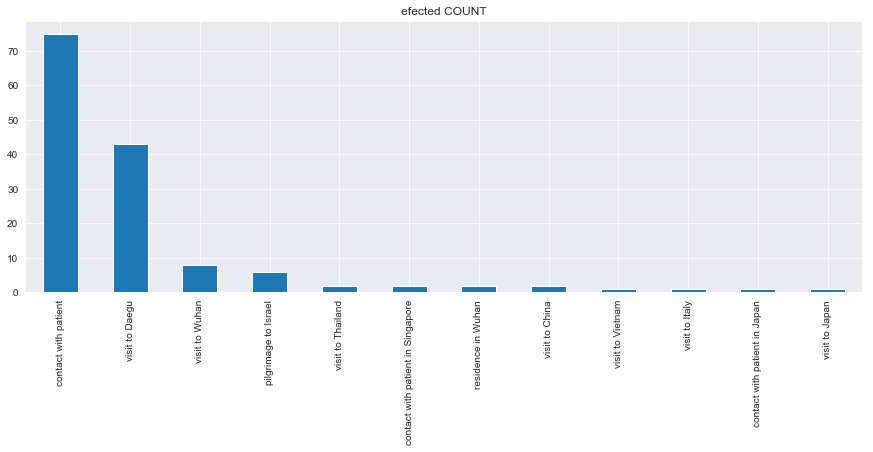

In [52]:
plt.figure(figsize=(15,5))
plt.title("efected COUNT")
df.infection_reason.value_counts().plot.bar();

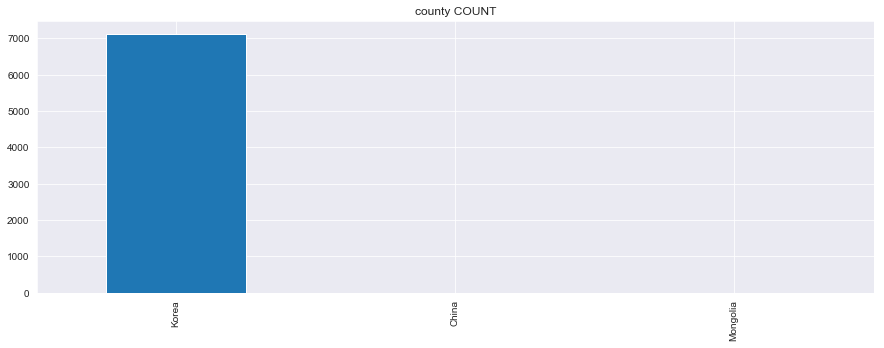

In [54]:
plt.figure(figsize=(15,5))
plt.title("county COUNT")
df.country.value_counts().plot.bar();

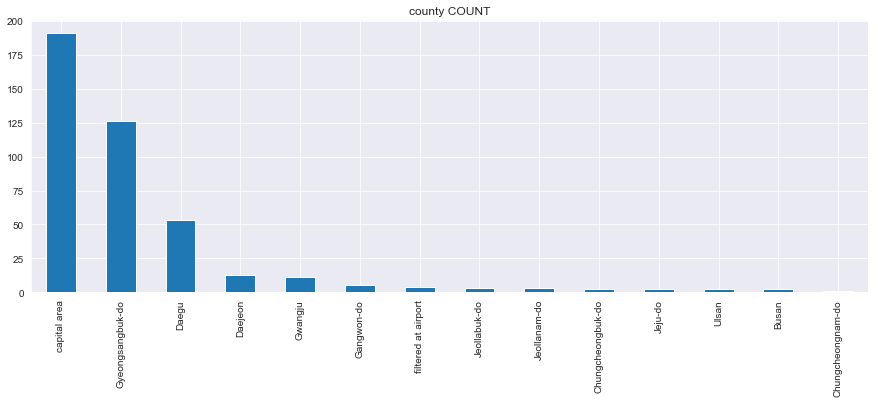

In [55]:
plt.figure(figsize=(15,5))
plt.title("region COUNT")
df.region.value_counts().plot.bar();

In [56]:
data=daily_count.resample('D').first().fillna(0).cumsum()

In [58]:
data=data[20:]
x=np.arange(len(data)).reshape(-1,1)
y=data.values

In [62]:
from sklearn.neural_network import MLPRegressor
model=MLPRegressor(hidden_layer_sizes=[32,32,10],max_iter=50000,alpha=0.0005,random_state=26)

In [63]:
_=model.fit(x,y)

In [64]:
test=np.arange(len(data)+7).reshape(-1,1)
pred=model.predict(test)

In [70]:
prediction=pred.round().astype(int)
week=[data.index[0]+timedelta(days=i) for i in range(len(prediction))]
dt_idx=pd.DatetimeIndex(week)
predicted_count=pd.Series(prediction,dt_idx)

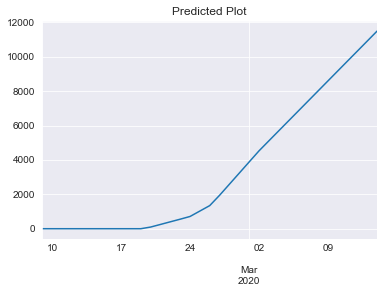

In [76]:
plt.title("Predicted Plot")
predicted_count.plot()